<a href="https://colab.research.google.com/github/AbdulSafiCS/Diabetes-Predictor/blob/master/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data exploration using statistical methods (central tendancy, skewness, correlation, imbalanced class)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, pearsonr, chi2_contingency, zscore
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

Installing dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
#formatted meta data

# Fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Extract metadata and variables information
metadata = cdc_diabetes_health_indicators.metadata
variables = cdc_diabetes_health_indicators.variables

# Convert metadata to DataFrame for better visualization
metadata_df = pd.DataFrame(list(metadata.items()), columns=["Attribute", "Value"])

# Convert variables information to DataFrame
variables_df = pd.DataFrame(variables)

# Print metadata table
print("Metadata Information:")
print(tabulate(metadata_df, headers="keys", tablefmt="grid"))

# Print variables table
print("\nVariables Information:")
print(tabulate(variables_df, headers="keys", tablefmt="grid"))


Metadata Information:
+----+--------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Attribute                | Value                                                                                                                                                                                                                         

Display dataset info and first 5 rows

In [ ]:
# combining features and classes into one dataframe
df = pd.concat([X, y], axis=1)

print("Basic information of the dataset:")
print(df.info())

print("First 5 rows of the dataset:")
print(df.head())

print("Summary statistics of the dataset:")
print(df.describe())

print("Missing values in the dataset:")
print(df.isnull().sum())

Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  

# Assignment 2

Central Tendency

In [ ]:
# combining features and classes into one dataframe formatted
# Data (as pandas DataFrames)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# Combining features and target into one DataFrame
df = pd.concat([X, y], axis=1)

# Dataset information
df_info = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum(),
    "Data Type": df.dtypes.astype(str)
})

# Print dataset information in a table
print("Basic Information of the Dataset:")
print(tabulate(df_info, headers="keys", tablefmt="grid"))

# Print first 5 rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(tabulate(df.head(), headers="keys", tablefmt="grid"))

# Print summary statistics
print("\nSummary Statistics of the Dataset:")
print(tabulate(df.describe(), headers="keys", tablefmt="grid"))

# Print missing values
missing_values_df = pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])
print("\nMissing Values in the Dataset:")
print(tabulate(missing_values_df, headers="keys", tablefmt="grid"))

Basic Information of the Dataset:
+----------------------+----------------------+------------------+-------------+
|                      | Column               |   Non-Null Count | Data Type   |
+======================+======================+==================+=============+
| HighBP               | HighBP               |           253680 | int64       |
+----------------------+----------------------+------------------+-------------+
| HighChol             | HighChol             |           253680 | int64       |
+----------------------+----------------------+------------------+-------------+
| CholCheck            | CholCheck            |           253680 | int64       |
+----------------------+----------------------+------------------+-------------+
| BMI                  | BMI                  |           253680 | int64       |
+----------------------+----------------------+------------------+-------------+
| Smoker               | Smoker               |           253680 | int64   

In [ ]:
print("Central tendency: ")
for col in df.select_dtypes(include=np.number):
  mean_val = df[col].mean()
  median_val = df[col].median()
  mode_val = df[col].mode()[0]
  midrange = (df[col].max() + df[col].min()) / 2
  print(f"{col}: Mean={mean_val}, Median={median_val}, Mode={mode_val}, Midrange={midrange}")


Central tendency: 
HighBP: Mean=0.4290011037527594, Median=0.0, Mode=0, Midrange=0.5
HighChol: Mean=0.4241209397666351, Median=0.0, Mode=0, Midrange=0.5
CholCheck: Mean=0.9626695048880479, Median=1.0, Mode=1, Midrange=0.5
BMI: Mean=28.382363607694735, Median=27.0, Mode=27, Midrange=55.0
Smoker: Mean=0.44316855881425415, Median=0.0, Mode=0, Midrange=0.5
Stroke: Mean=0.04057079785556607, Median=0.0, Mode=0, Midrange=0.5
HeartDiseaseorAttack: Mean=0.09418558814254178, Median=0.0, Mode=0, Midrange=0.5
PhysActivity: Mean=0.7565436770734784, Median=1.0, Mode=1, Midrange=0.5
Fruits: Mean=0.6342557552822453, Median=1.0, Mode=1, Midrange=0.5
Veggies: Mean=0.811419899085462, Median=1.0, Mode=1, Midrange=0.5
HvyAlcoholConsump: Mean=0.05619678334910123, Median=0.0, Mode=0, Midrange=0.5
AnyHealthcare: Mean=0.9510525070955534, Median=1.0, Mode=1, Midrange=0.5
NoDocbcCost: Mean=0.08417691579943236, Median=0.0, Mode=0, Midrange=0.5
GenHlth: Mean=2.5113923052664773, Median=2.0, Mode=2, Midrange=3.0
Men

In [ ]:
#formatted central tendency


data = []

# Iterate through numerical columns in the DataFrame
for col in df.select_dtypes(include=np.number):
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    midrange = (df[col].max() + df[col].min()) / 2

    # Append to list for tabulation
    data.append([col, mean_val, median_val, mode_val, midrange])

# Print formatted table
headers = ["Column", "Mean", "Median", "Mode", "Midrange"]
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))



╒══════════════════════╤════════════╤══════════╤════════╤════════════╕
│ Column               │       Mean │   Median │   Mode │   Midrange │
╞══════════════════════╪════════════╪══════════╪════════╪════════════╡
│ HighBP               │  0.429001  │        0 │      0 │        0.5 │
├──────────────────────┼────────────┼──────────┼────────┼────────────┤
│ HighChol             │  0.424121  │        0 │      0 │        0.5 │
├──────────────────────┼────────────┼──────────┼────────┼────────────┤
│ CholCheck            │  0.96267   │        1 │      1 │        0.5 │
├──────────────────────┼────────────┼──────────┼────────┼────────────┤
│ BMI                  │ 28.3824    │       27 │     27 │       55   │
├──────────────────────┼────────────┼──────────┼────────┼────────────┤
│ Smoker               │  0.443169  │        0 │      0 │        0.5 │
├──────────────────────┼────────────┼──────────┼────────┼────────────┤
│ Stroke               │  0.0405708 │        0 │      0 │        0.5 │
├─────

Dispersion measures

HighBP: Range=1, IQR=1.0, Variance=0.24496012235870343, Standard Deviation=0.4949344626904692
HighChol: Range=1, IQR=1.0, Variance=0.24424333101879692, Standard Deviation=0.4942098046566831
CholCheck: Range=1, IQR=0.0, Variance=0.03593707090959478, Standard Deviation=0.18957075436257245
BMI: Range=86, IQR=7.0, Variance=43.67483904767715, Standard Deviation=6.608694201404477
Smoker: Range=1, IQR=1.0, Variance=0.24677116005895403, Standard Deviation=0.4967606667792389
Stroke: Range=1, IQR=0.0, Variance=0.03892496165805117, Standard Deviation=0.19729409939998502
HeartDiseaseorAttack: Range=1, IQR=0.0, Variance=0.08531499943810153, Standard Deviation=0.29208731475040395
PhysActivity: Range=1, IQR=0.0, Variance=0.18418606781054644, Standard Deviation=0.42916904339729167
Fruits: Range=1, IQR=1.0, Variance=0.2319763066187926, Standard Deviation=0.481639187171053
Veggies: Range=1, IQR=0.0, Variance=0.15301824964755553, Standard Deviation=0.3911754716844546
HvyAlcoholConsump: Range=1, IQR=0.0, 

<function matplotlib.pyplot.show(close=None, block=None)>

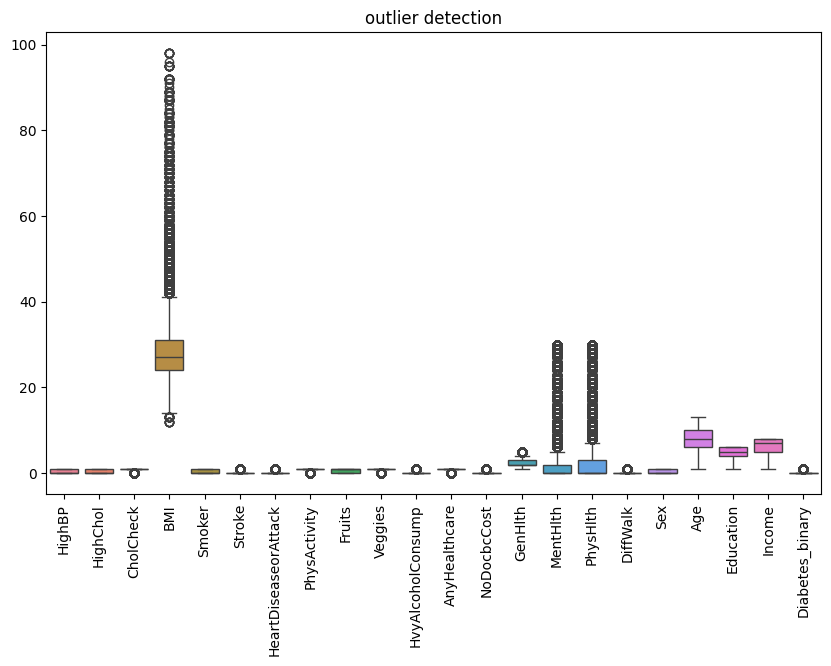

In [ ]:
for col in df.select_dtypes(include=np.number):
  range_val = df[col].max() - df[col].min()
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
  variance = df[col].var()
  std_dev = df[col].std()
  print(f"{col}: Range={range_val}, IQR={iqr}, Variance={variance}, Standard Deviation={std_dev}")

# detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title('outlier detection')
plt.show

Skewness

╒══════════════════════╤═══════╤════════════╤══════════╤════════════╤═══════╤═════════╤═══════╤════════════╤═══════════╕
│ Column               │   Min │   Q1 (25%) │   Median │   Q3 (75%) │   Max │   Range │   IQR │   Variance │   Std Dev │
╞══════════════════════╪═══════╪════════════╪══════════╪════════════╪═══════╪═════════╪═══════╪════════════╪═══════════╡
│ HighBP               │     0 │      0.000 │    0.000 │      1.000 │     1 │       1 │ 1.000 │      0.245 │     0.495 │
├──────────────────────┼───────┼────────────┼──────────┼────────────┼───────┼─────────┼───────┼────────────┼───────────┤
│ HighChol             │     0 │      0.000 │    0.000 │      1.000 │     1 │       1 │ 1.000 │      0.244 │     0.494 │
├──────────────────────┼───────┼────────────┼──────────┼────────────┼───────┼─────────┼───────┼────────────┼───────────┤
│ CholCheck            │     0 │      1.000 │    1.000 │      1.000 │     1 │       1 │ 0.000 │      0.036 │     0.190 │
├──────────────────────┼───────┼

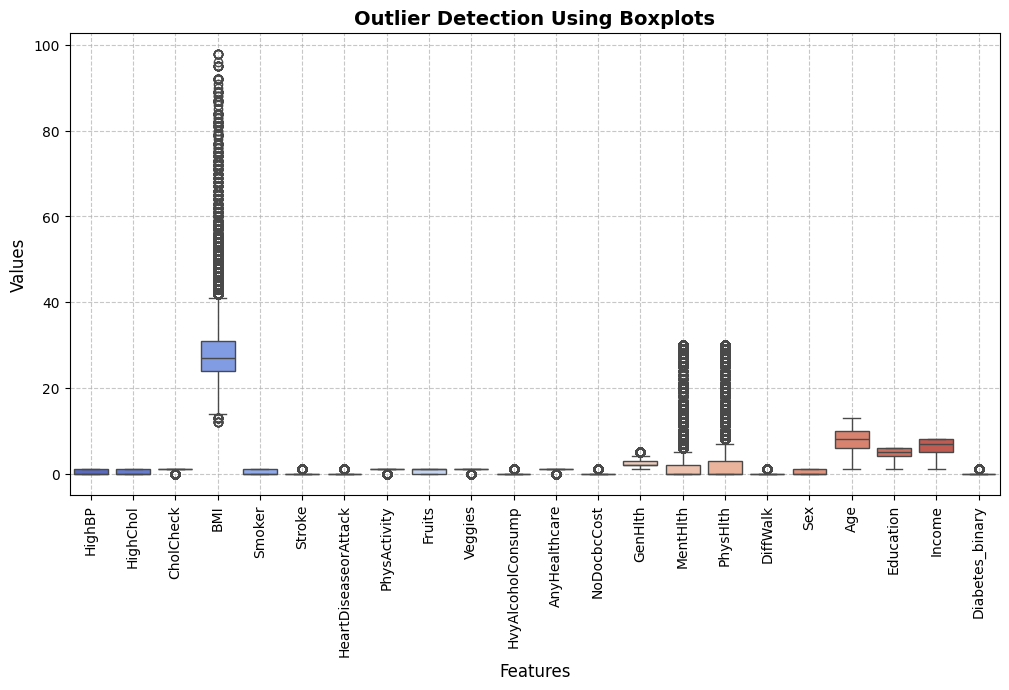

In [ ]:
# Formatted Dispersion Measures:

dispersion_data = []

# Iterate through numerical columns in the DataFrame
for col in df.select_dtypes(include=np.number):
    min_val = df[col].min()
    q1 = df[col].quantile(0.25)
    median = df[col].median()
    q3 = df[col].quantile(0.75)
    max_val = df[col].max()
    range_val = max_val - min_val
    iqr = q3 - q1
    variance = df[col].var()
    std_dev = df[col].std()

    # Append to list for tabulation
    dispersion_data.append([col, min_val, q1, median, q3, max_val, range_val, iqr, variance, std_dev])

# Print formatted table
headers = ["Column", "Min", "Q1 (25%)", "Median", "Q3 (75%)", "Max", "Range", "IQR", "Variance", "Std Dev"]
print(tabulate(dispersion_data, headers=headers, tablefmt="fancy_grid", floatfmt=".3f"))

# ---------------------- Outlier Detection with Boxplots ----------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number), palette="coolwarm")
plt.xticks(rotation=90, fontsize=10)
plt.title("Outlier Detection Using Boxplots", fontsize=14, fontweight="bold")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [ ]:
print("\nSkewness:")
for col in df.select_dtypes(include=np.number):
    skewness = skew(df[col].dropna())
    print(f"{col}: Skewness={skewness}")


Skewness:
HighBP: Skewness=0.28690277819689786
HighChol: Skewness=0.3070728628831409
CholCheck: Skewness=-4.881242556233967
BMI: Skewness=2.1219912109445866
Smoker: Skewness=0.2288085873169426
Stroke: Skewness=4.657312196086392
HeartDiseaseorAttack: Skewness=2.7787253415032604
PhysActivity: Skewness=-1.1955390849656513
Fruits: Skewness=-0.5574962481276564
Veggies: Skewness=-1.5922292445936013
HvyAlcoholConsump: Skewness=3.854108936911349
AnyHealthcare: Skewness=-4.181091032935905
NoDocbcCost: Skewness=2.995272182778197
GenHlth: Skewness=0.4228643747124794
MentHlth: Skewness=2.7211322755915326
PhysHlth: Skewness=2.2073818629367232
DiffWalk: Skewness=1.7738969429327287
Sex: Skewness=0.24034830611078623
Age: Skewness=-0.359901119768877
Education: Skewness=-0.7772506746642679
Income: Skewness=-0.8913397201703077
Diabetes_binary: Skewness=2.083012078434332


Checking imbalance in the data

Skewness of Numeric Columns:
+----+----------------------+------------+
|    | Column               |   Skewness |
+====+======================+============+
|  0 | HighBP               |   0.286903 |
+----+----------------------+------------+
|  1 | HighChol             |   0.307073 |
+----+----------------------+------------+
|  2 | CholCheck            |  -4.88124  |
+----+----------------------+------------+
|  3 | BMI                  |   2.12199  |
+----+----------------------+------------+
|  4 | Smoker               |   0.228809 |
+----+----------------------+------------+
|  5 | Stroke               |   4.65731  |
+----+----------------------+------------+
|  6 | HeartDiseaseorAttack |   2.77873  |
+----+----------------------+------------+
|  7 | PhysActivity         |  -1.19554  |
+----+----------------------+------------+
|  8 | Fruits               |  -0.557496 |
+----+----------------------+------------+
|  9 | Veggies              |  -1.59223  |
+----+-------------------

<Figure size 1500x1000 with 0 Axes>

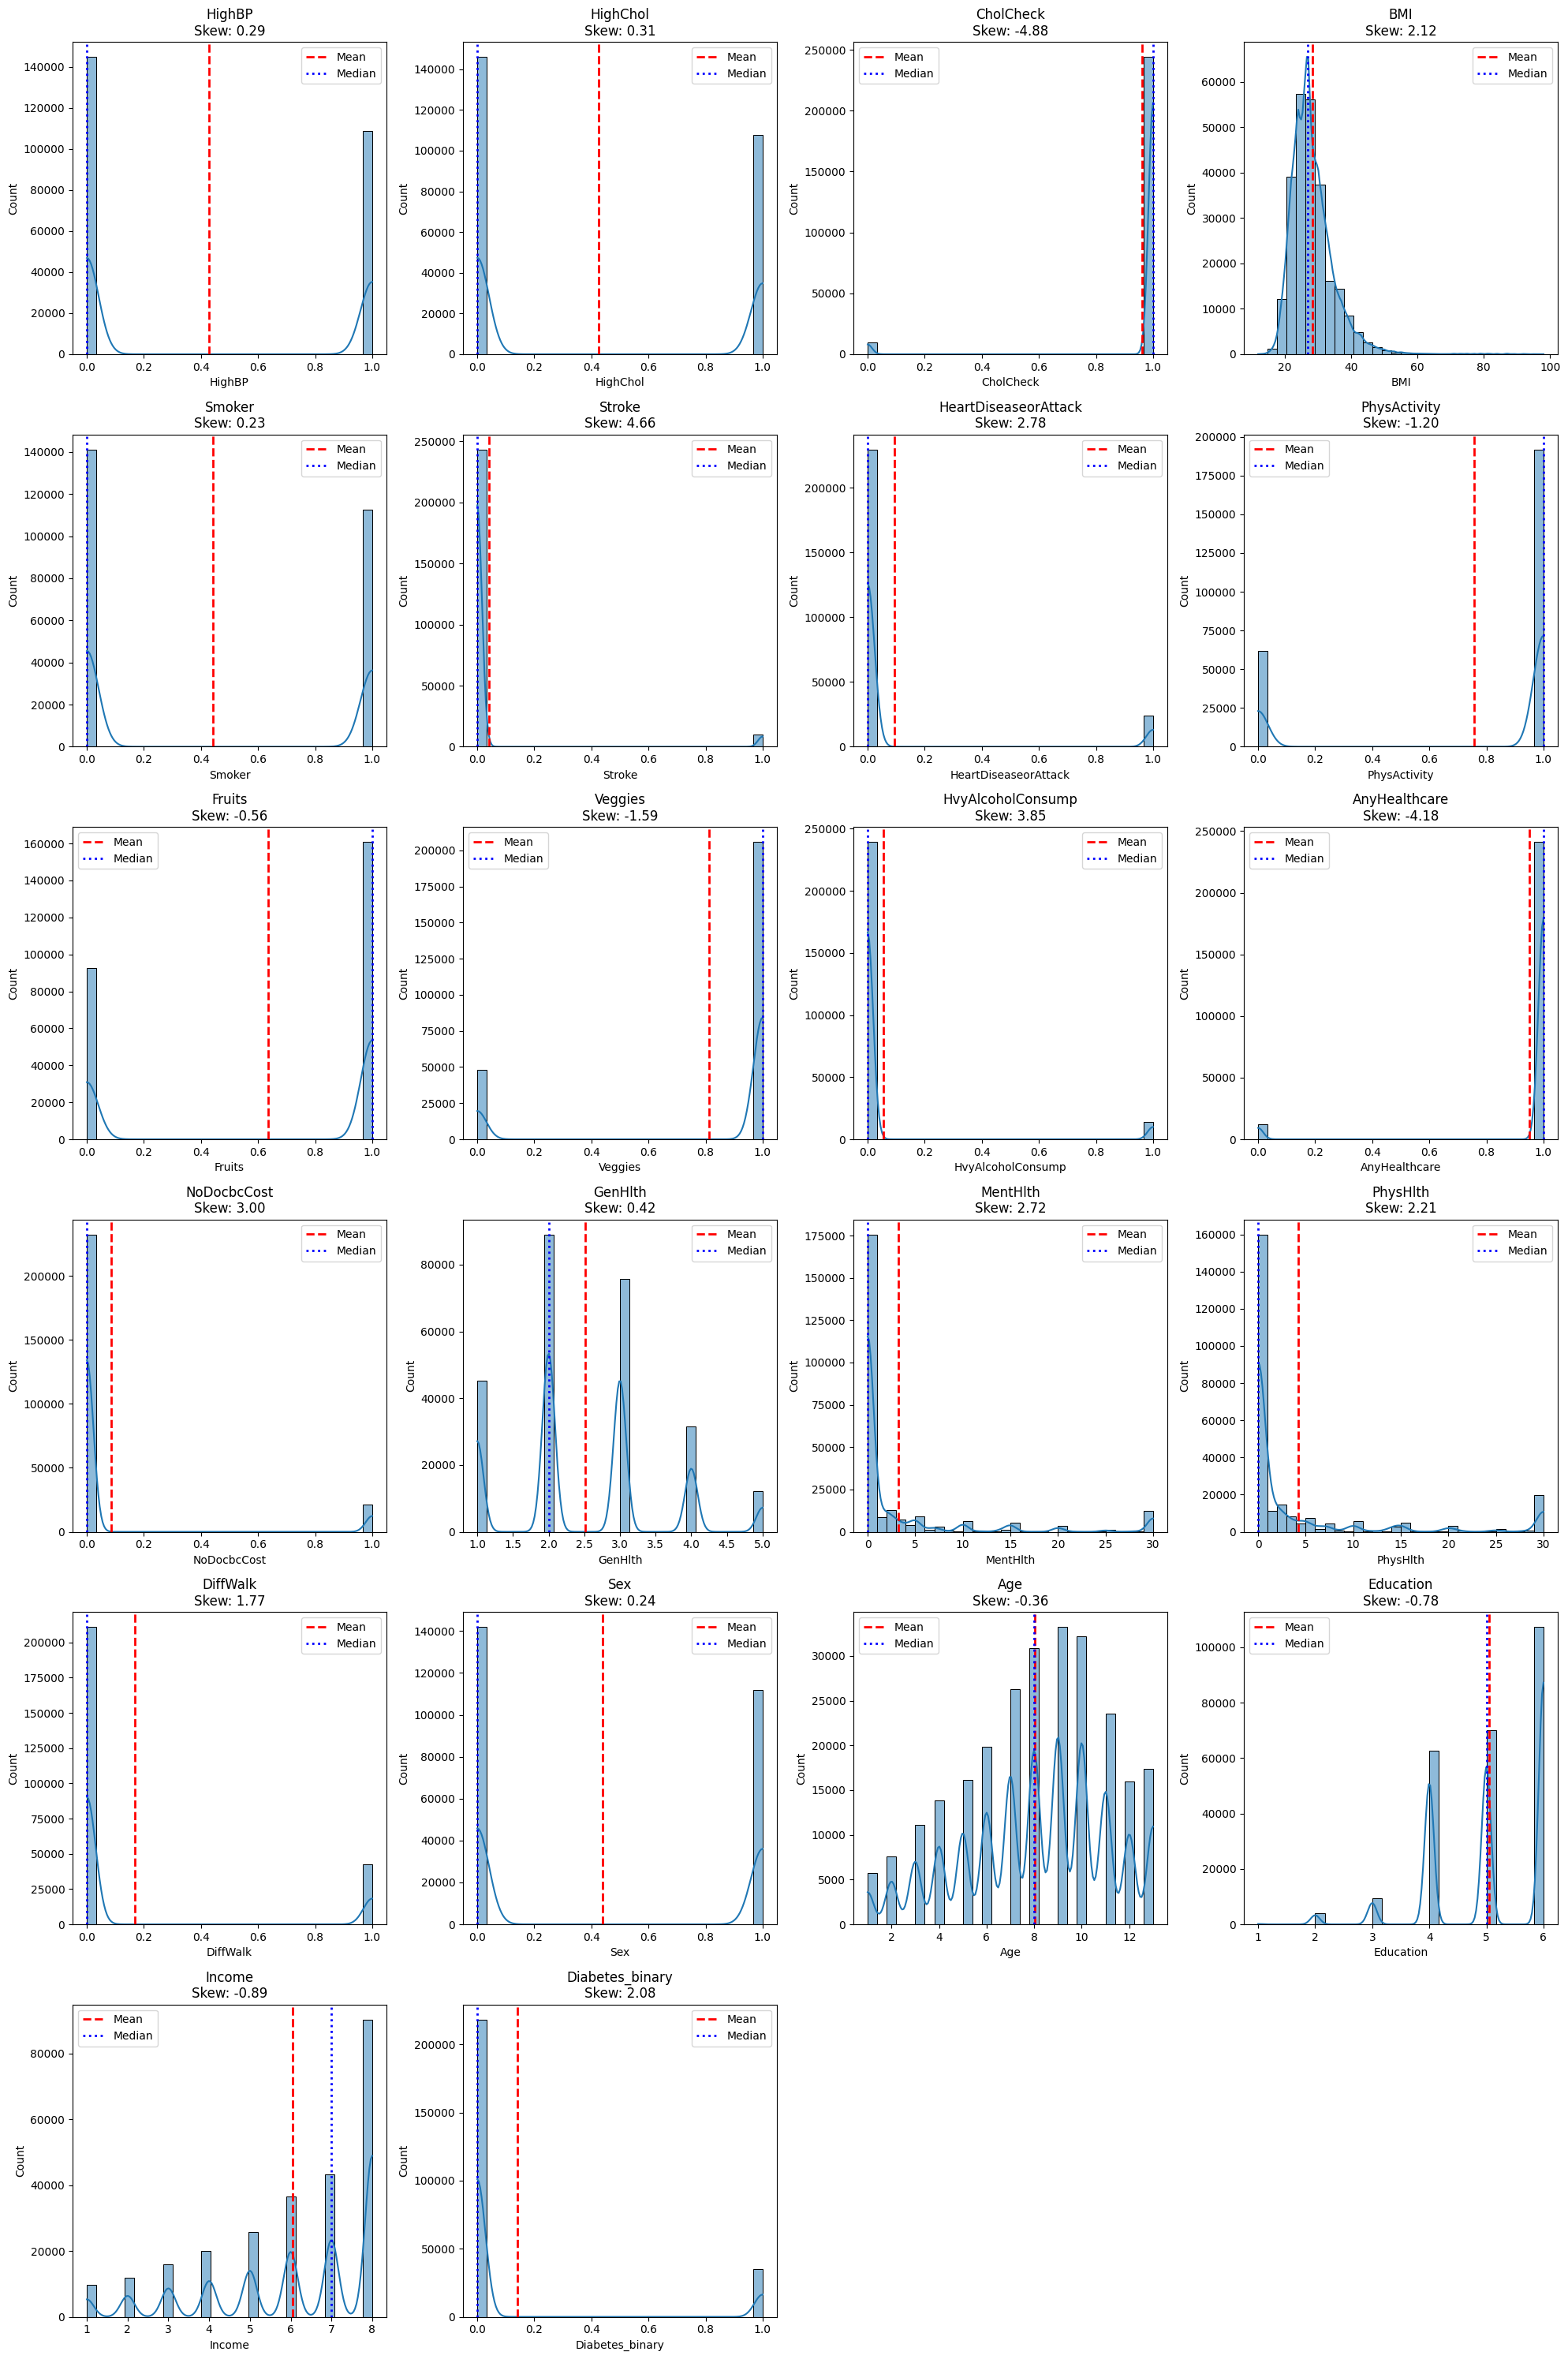

In [ ]:

# Calculate skewness for each numeric column
skewness_data = []
for col in df.select_dtypes(include=np.number):
    skew_val = skew(df[col].dropna())  # Drop NaN values to avoid errors
    skewness_data.append([col, skew_val])

# Convert to DataFrame for better formatting
skewness_df = pd.DataFrame(skewness_data, columns=["Column", "Skewness"])

# Print in table format
print("Skewness of Numeric Columns:")
print(tabulate(skewness_df, headers="keys", tablefmt="grid"))

plt.figure(figsize=(15, 10))

# Get numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate skewness
skewness_data = []
for col in numeric_cols:
    skew_val = skew(df[col].dropna())  # Drop NaN values
    skewness_data.append([col, skew_val])

# Convert to DataFrame
skewness_df = pd.DataFrame(skewness_data, columns=["Column", "Skewness"])

# Print Skewness Table
print("Skewness of Numeric Columns:")
print(tabulate(skewness_df, headers="keys", tablefmt="grid"))

# Set number of columns per row
num_cols_per_row = 4
num_rows = int(np.ceil(len(numeric_cols) / num_cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through each column and plot
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(df[col], kde=True, bins=30, ax=ax)
    ax.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
    ax.axvline(df[col].median(), color='blue', linestyle='dotted', linewidth=2, label="Median")
    ax.set_title(f"{col}\nSkew: {skewness_df.loc[i, 'Skewness']:.2f}")
    ax.legend()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Class Distribution:
Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64


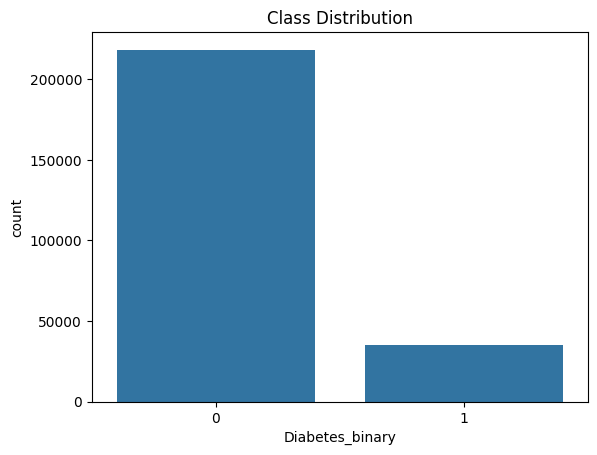

In [ ]:
if "Diabetes_binary" in df.columns:
    print("\nClass Distribution:")
    print(df["Diabetes_binary"].value_counts())
    sns.countplot(x=df["Diabetes_binary"])
    plt.title("Class Distribution")
    plt.show()

Correlation Matrix:


Correlation Matrix:
                        HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                1.000000  0.298199   0.098508  0.213748  0.096991   
HighChol              0.298199  1.000000   0.085642  0.106722  0.091299   
CholCheck             0.098508  0.085642   1.000000  0.034495 -0.009929   
BMI                   0.213748  0.106722   0.034495  1.000000  0.013804   
Smoker                0.096991  0.091299  -0.009929  0.013804  1.000000   
Stroke                0.129575  0.092620   0.024158  0.020153  0.061173   
HeartDiseaseorAttack  0.209361  0.180765   0.044206  0.052904  0.114441   
PhysActivity         -0.125267 -0.078046   0.004190 -0.147294 -0.087401   
Fruits               -0.040555 -0.040859   0.023849 -0.087518 -0.077666   
Veggies              -0.061266 -0.039874   0.006121 -0.062275 -0.030678   
HvyAlcoholConsump    -0.003972 -0.011543  -0.023730 -0.048736  0.101619   
AnyHealthcare         0.038425  0.042230   0.117626 -0.018471 -0.023251   
NoDo

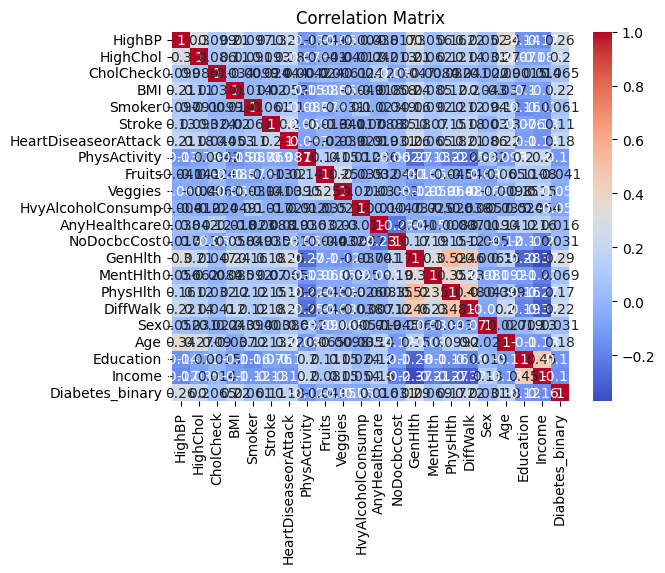

In [ ]:
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Pearson correlation

In [ ]:
if "BMI" in df.columns and "Age" in df.columns:
    pearson_corr, _ = pearsonr(df["BMI"], df["Age"])
    print(f"Pearson Correlation between BMI and Age: {pearson_corr}")

Pearson Correlation between BMI and Age: -0.03661763519792297


Chi-square test

In [ ]:
if "HighBP" in df.columns and "HighChol" in df.columns:
    contingency_table = pd.crosstab(df["HighBP"], df["HighChol"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between HighBP and HighChol: Chi2={chi2}, p-value={p}")

Chi-square test between HighBP and HighChol: Chi2=22556.72176125731, p-value=0.0


# Assignment 3

Data Visualization

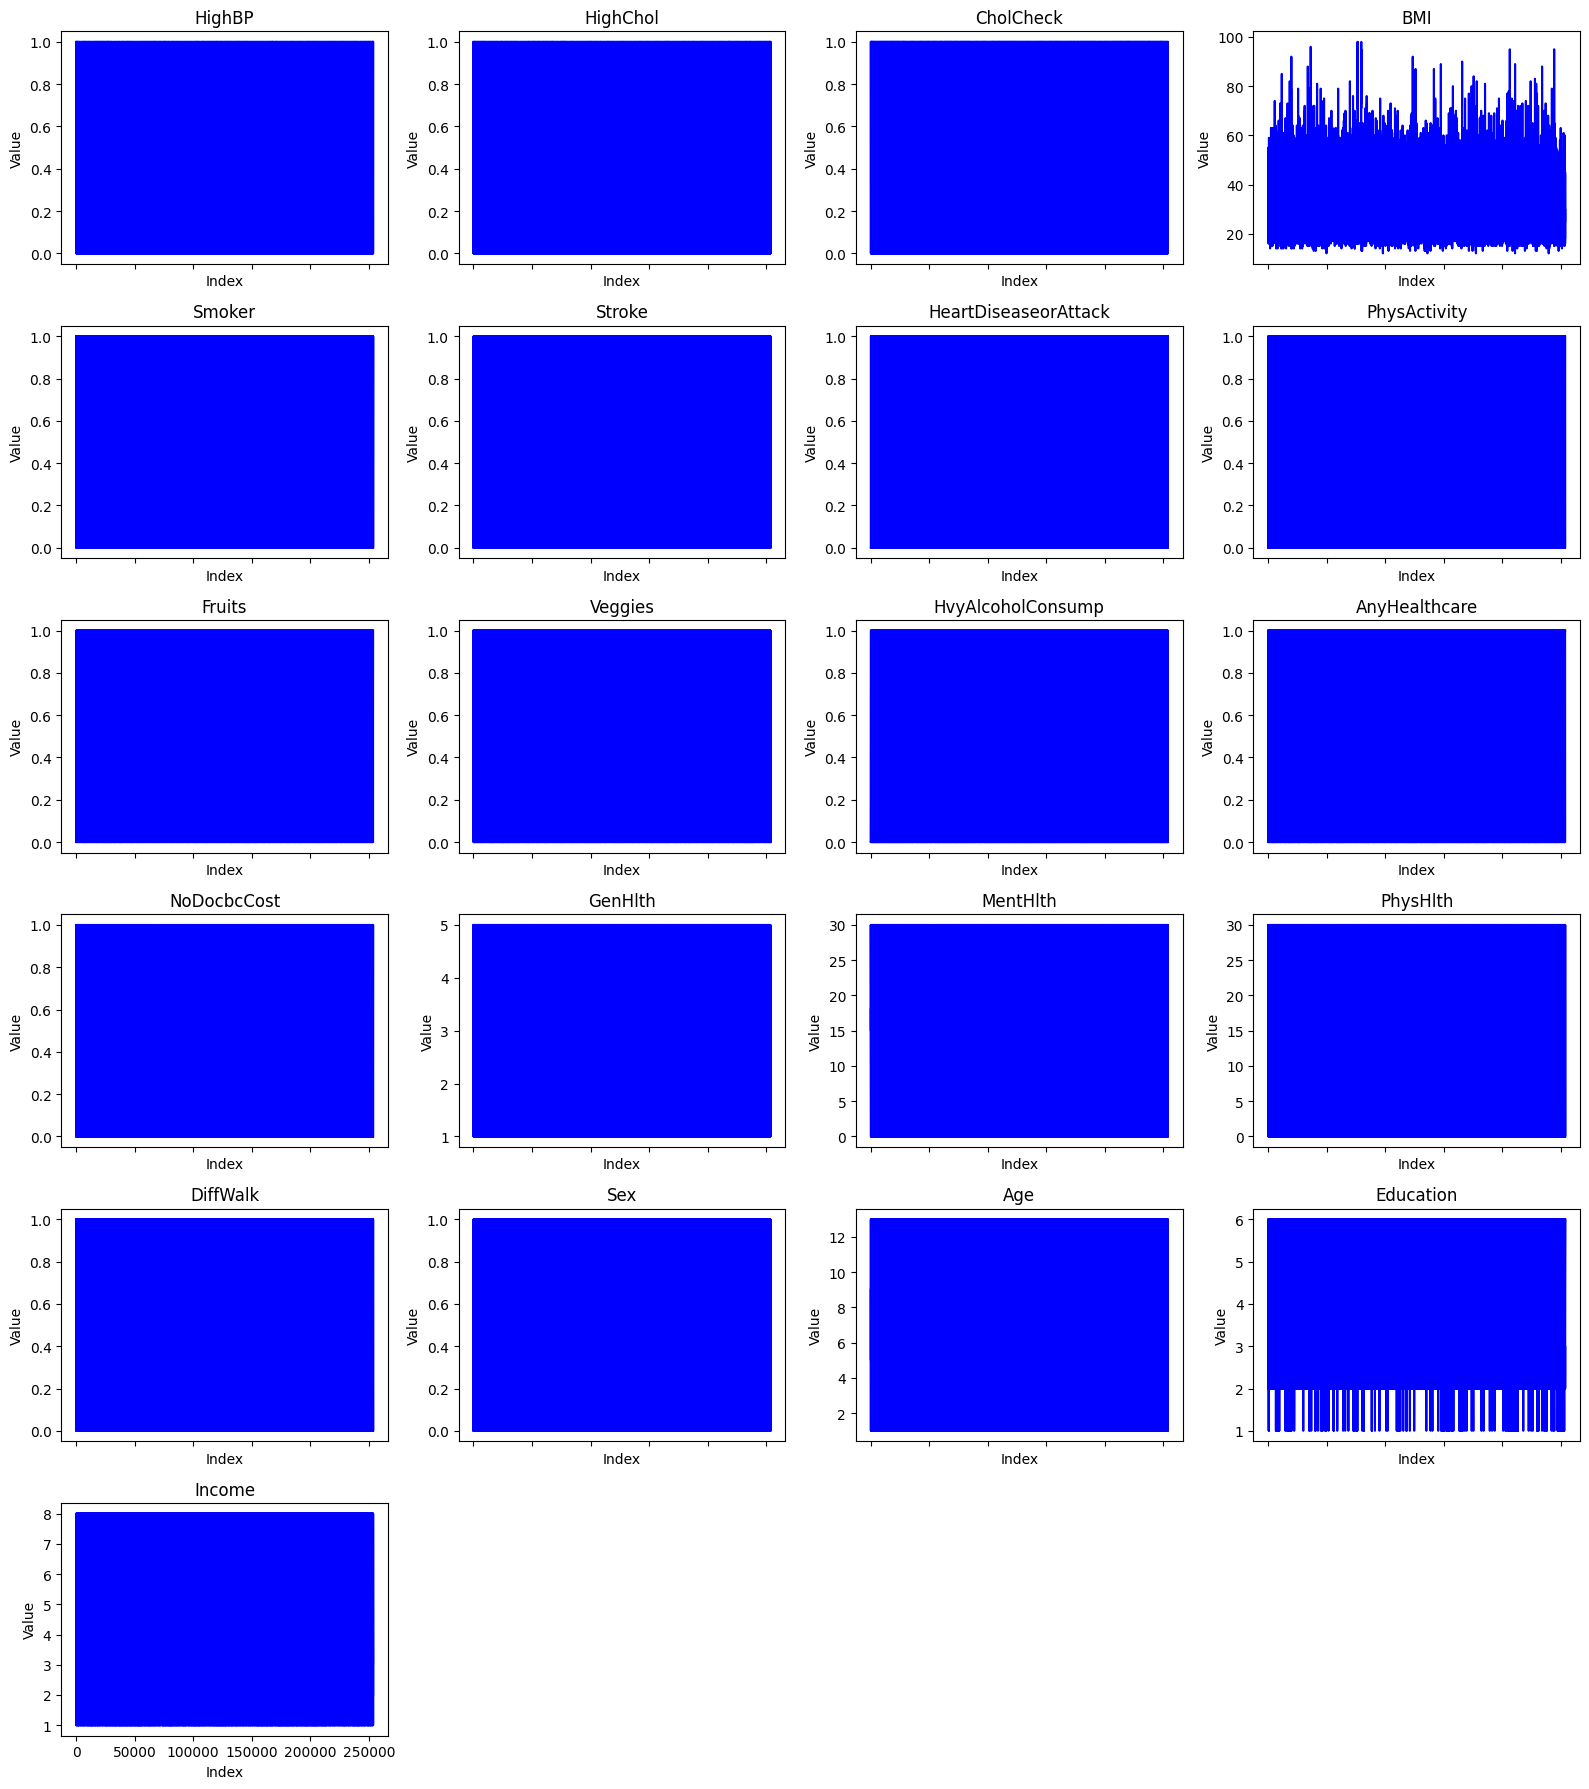

In [ ]:
import math
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = X.select_dtypes(include='number').columns.tolist()

# Check if any numeric columns exist
if not numeric_cols:
    print("No numerical features found to plot.")
else:
    num_features = len(numeric_cols)
    ncols = 4
    nrows = math.ceil(num_features / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 3 * nrows), sharex=True)
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        axes[i].plot(X.index, X[col], linestyle='-', color='blue')
        axes[i].set_title(col)
        axes[i].set_ylabel("Value")
        axes[i].set_xlabel("Index")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


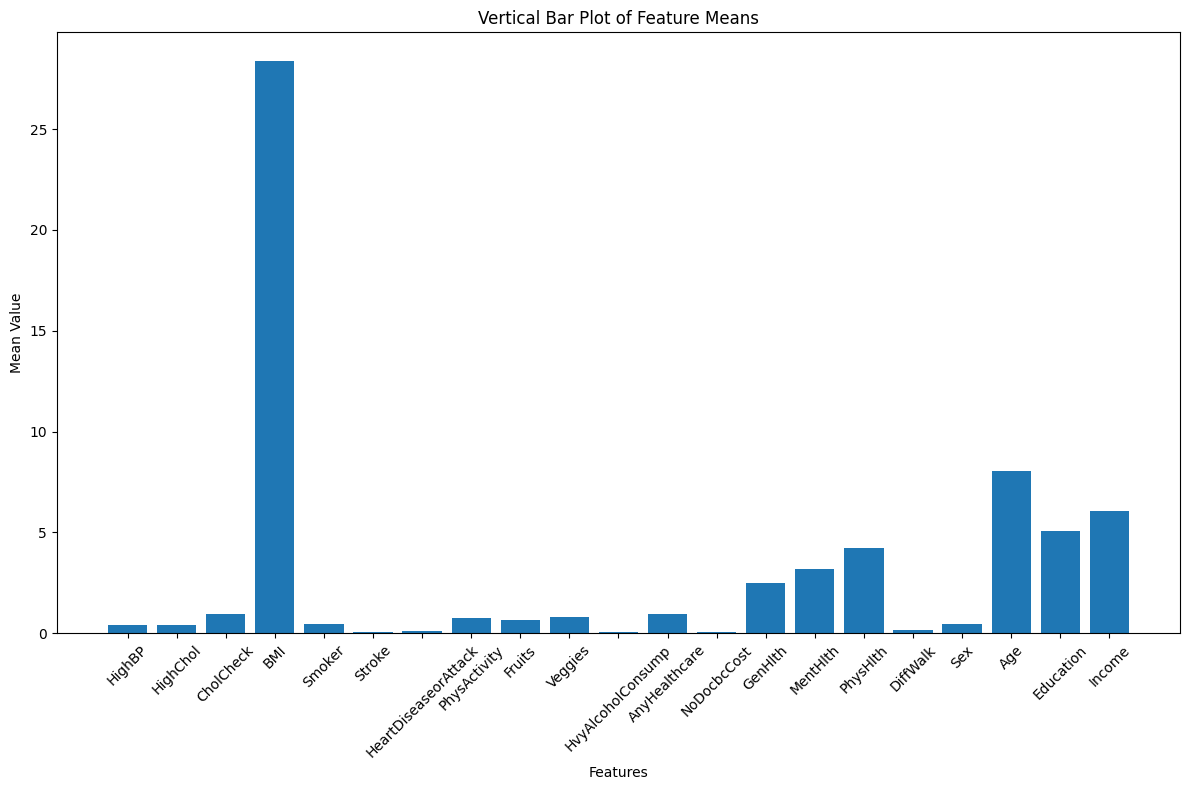

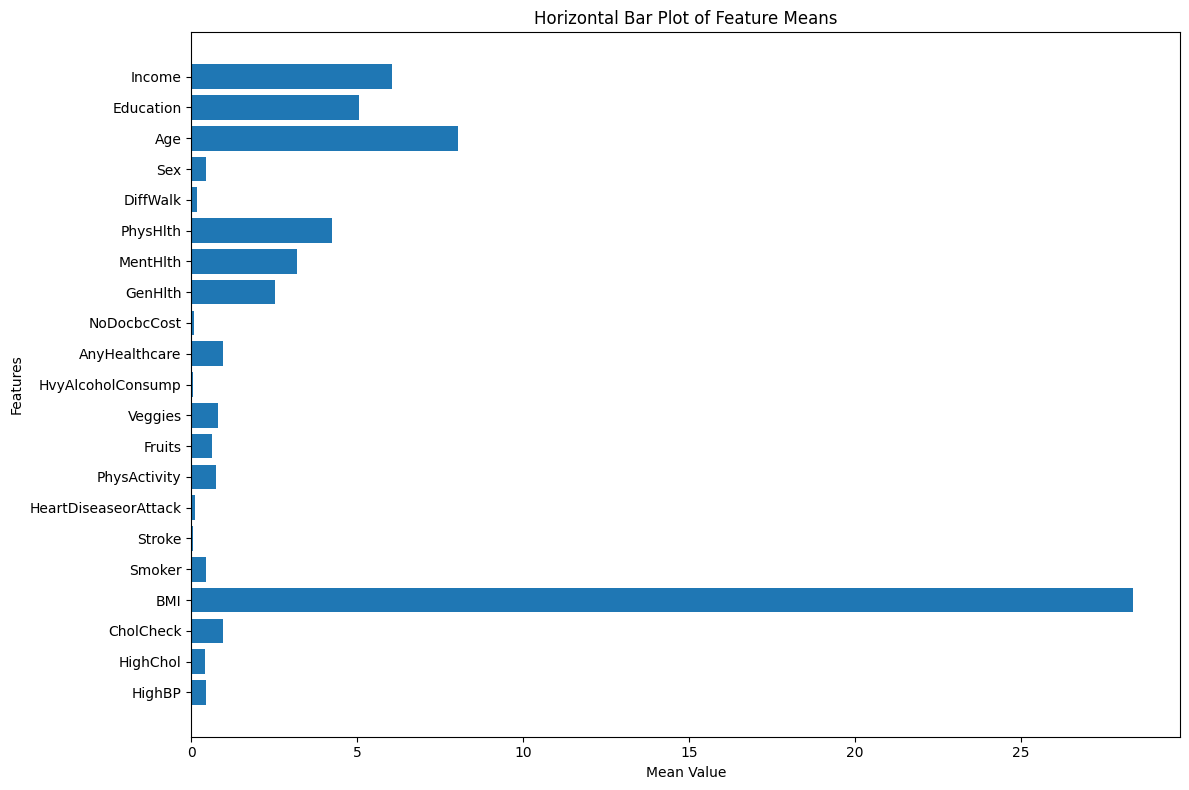

In [ ]:
#vertical and horizontal plots
feature_means = X.mean()

# Create a vertical bar plot for the feature means
plt.figure(figsize=(12, 8))
plt.bar(feature_means.index, feature_means.values)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Vertical Bar Plot of Feature Means")
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


# Create a horizontal bar plot for the feature means
plt.figure(figsize=(12, 8))
plt.barh(feature_means.index, feature_means.values)
plt.xlabel("Mean Value")
plt.ylabel("Features")
plt.title("Horizontal Bar Plot of Feature Means")
plt.tight_layout()
plt.show()

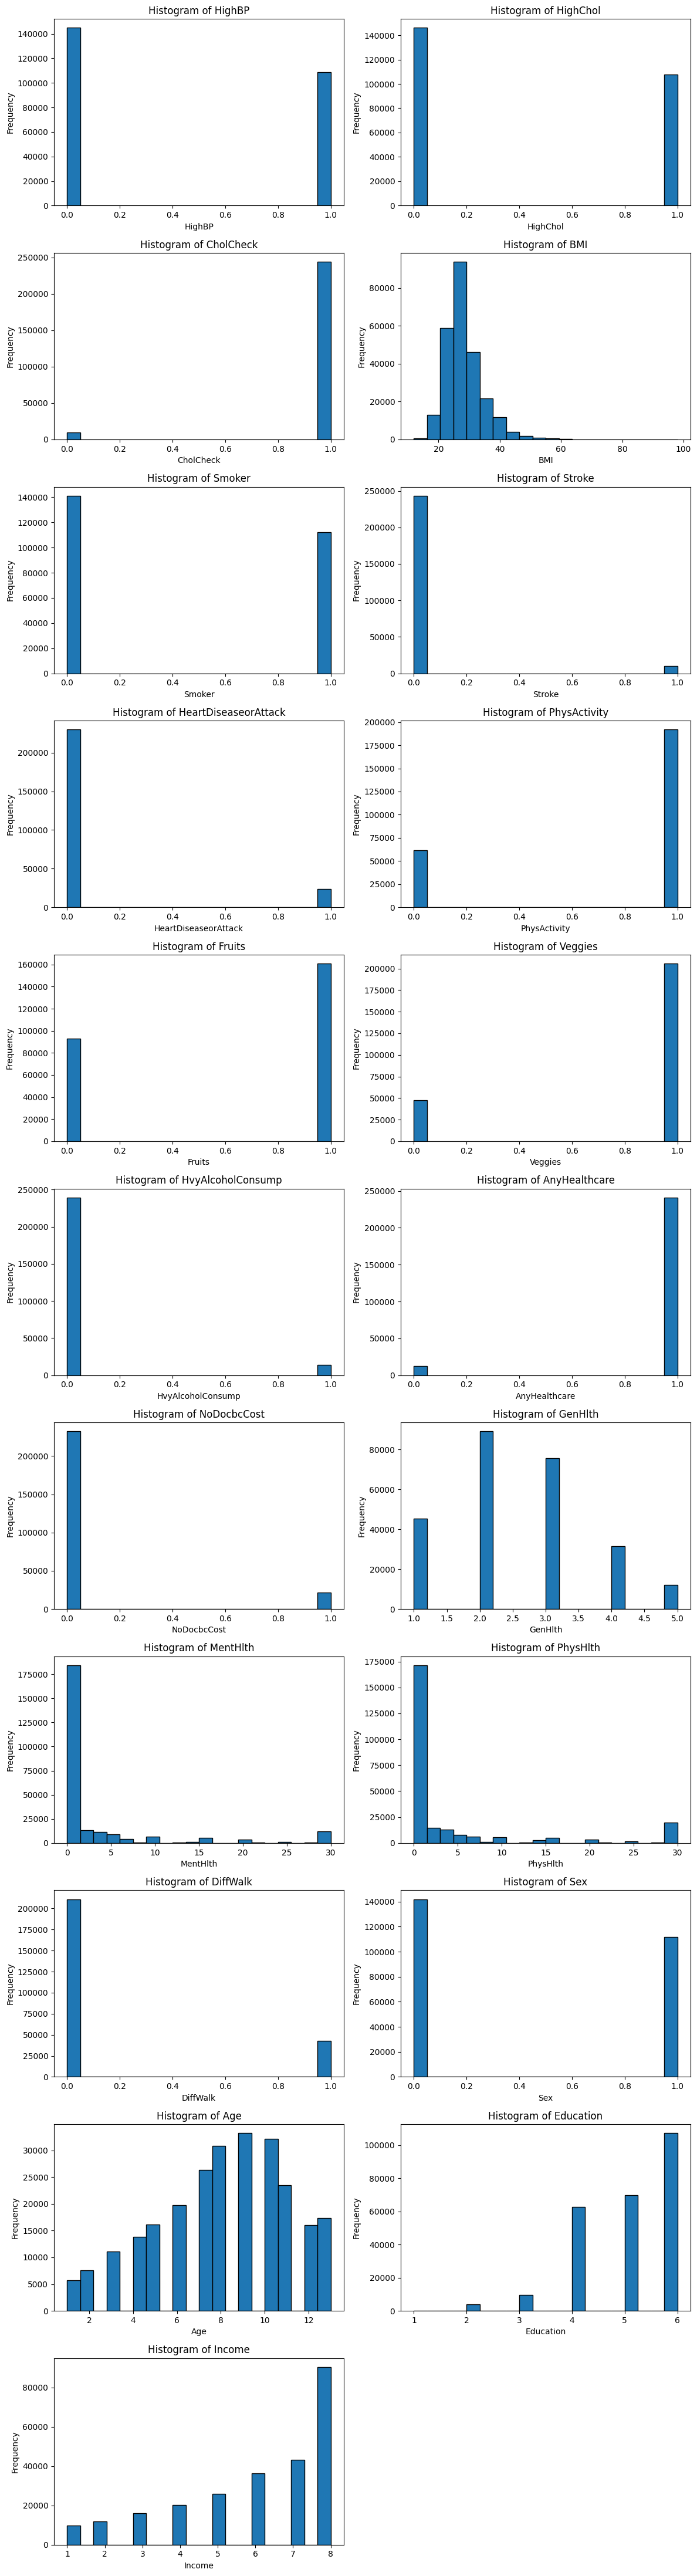

In [ ]:
#Histograms
# Determine grid layout based on number of features
n_features = len(X.columns)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot histogram for each feature
for i, col in enumerate(X.columns):
    axes[i].hist(X[col], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots if the number of features is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

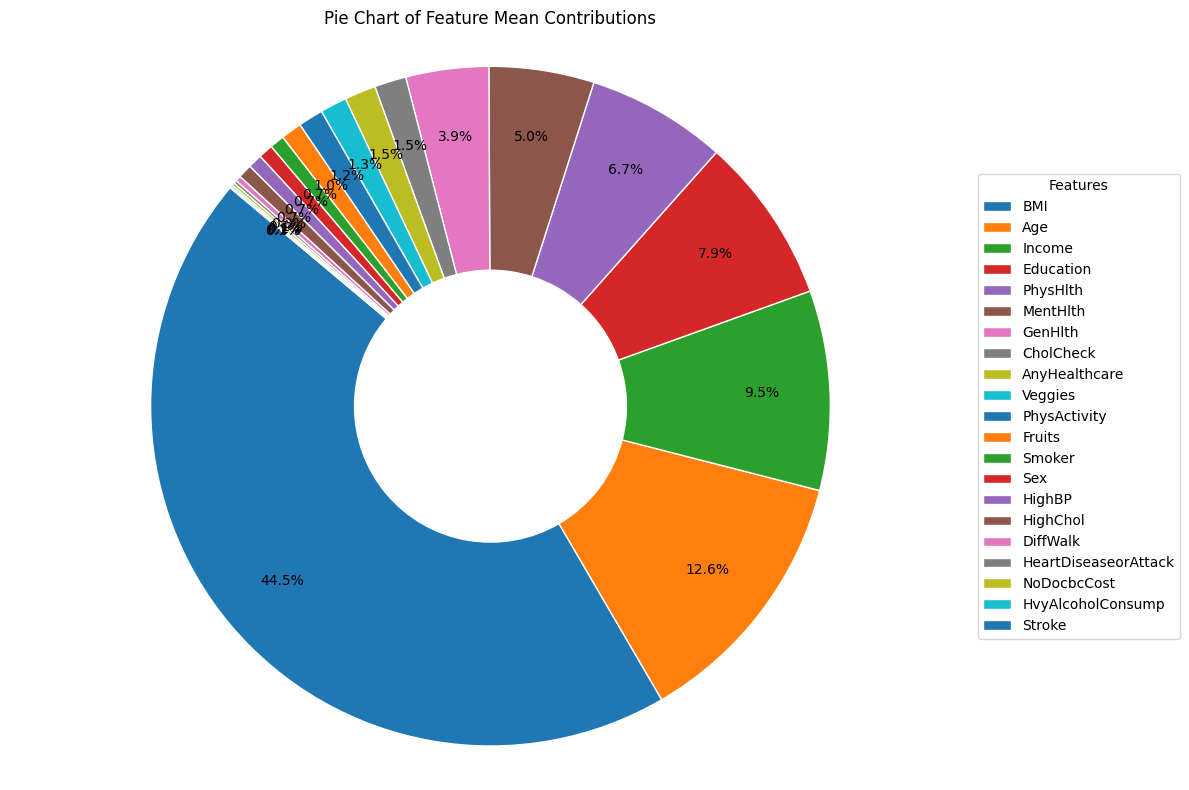

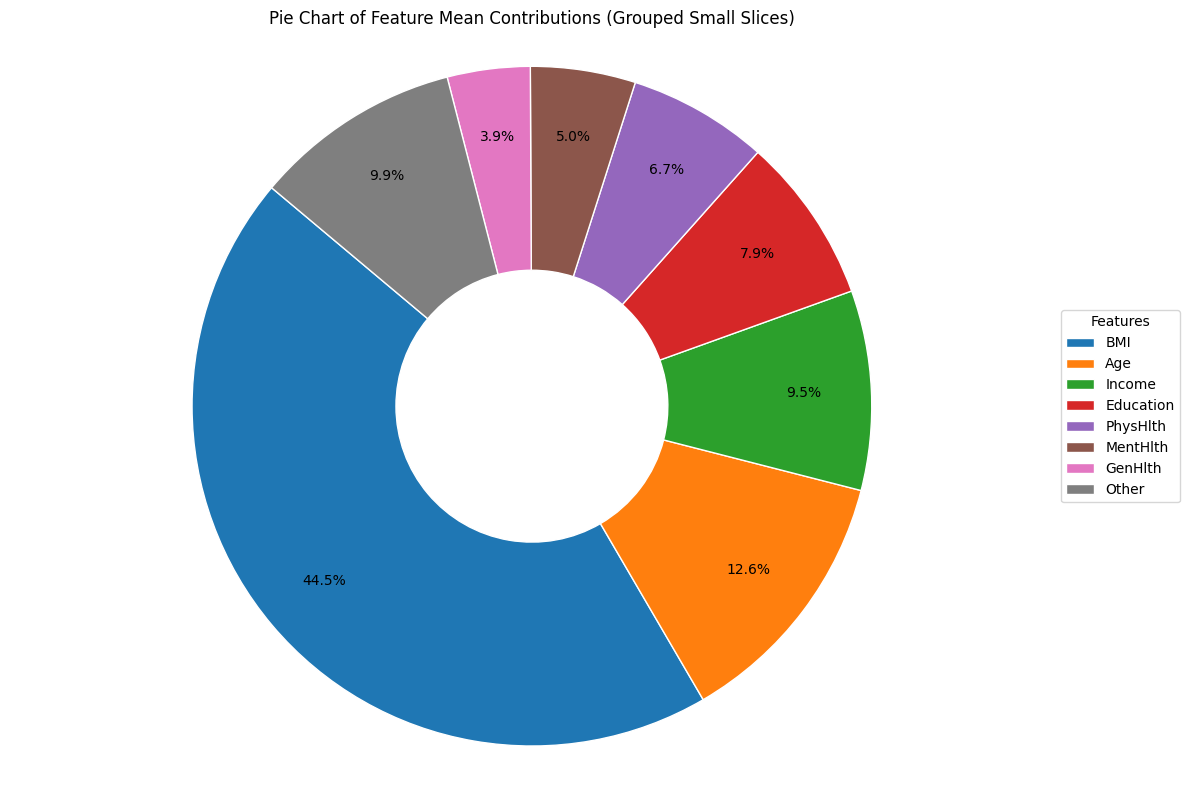

In [ ]:
#Pie Plot

# Calculate the mean value of each feature and sort descending
feature_means = X.mean().sort_values(ascending=False)

# Create a pie chart using the feature means
fig, ax = plt.subplots(figsize=(12, 8))

# Optional: Create a donut-like chart by setting a "width" in wedgeprops
# For a traditional pie, remove 'wedgeprops' or set width=1
wedges, texts, autotexts = ax.pie(
    feature_means.values,
    startangle=140,
    autopct='%1.1f%%',
    pctdistance=0.8,
    wedgeprops={'width': 0.6, 'edgecolor': 'white'}
)

# Remove direct slice labels to reduce clutter; we'll use a legend instead
for text in texts:
    text.set_visible(False)

# Create a legend showing feature names
ax.legend(
    wedges,
    feature_means.index,
    title="Features",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)  # Adjust as needed for best placement
)

ax.set_title("Pie Chart of Feature Mean Contributions")
ax.axis('equal')  # Ensures the pie chart is a circle
plt.tight_layout()
plt.show()

#Small Features Combined into OTHER for readibility

# Calculate the mean value of each feature, then sort descending
feature_means = X.mean().sort_values(ascending=False)

# Define a threshold (e.g., 3%) below which slices will be grouped
threshold = 0.03
total = feature_means.sum()

# Separate large slices from small slices
large_slices = feature_means[feature_means / total >= threshold]
small_slices = feature_means[feature_means / total < threshold]

# Sum up the small slices
others_sum = small_slices.sum()

# Combine large slices with a new "Other" slice using pd.concat
plot_slices = pd.concat([large_slices, pd.Series({'Other': others_sum})])

# Create a donut chart
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    plot_slices.values,
    startangle=140,
    autopct='%1.1f%%',
    pctdistance=0.8,
    wedgeprops={'width': 0.6, 'edgecolor': 'white'}  # donut shape
)

# Remove direct slice labels (to avoid clutter) and use a legend
for text in texts:
    text.set_visible(False)

ax.legend(
    wedges,
    plot_slices.index,
    title="Features",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

ax.set_title("Pie Chart of Feature Mean Contributions (Grouped Small Slices)")
ax.axis('equal')  # Ensures the pie/donut is a circle
plt.tight_layout()
plt.show()

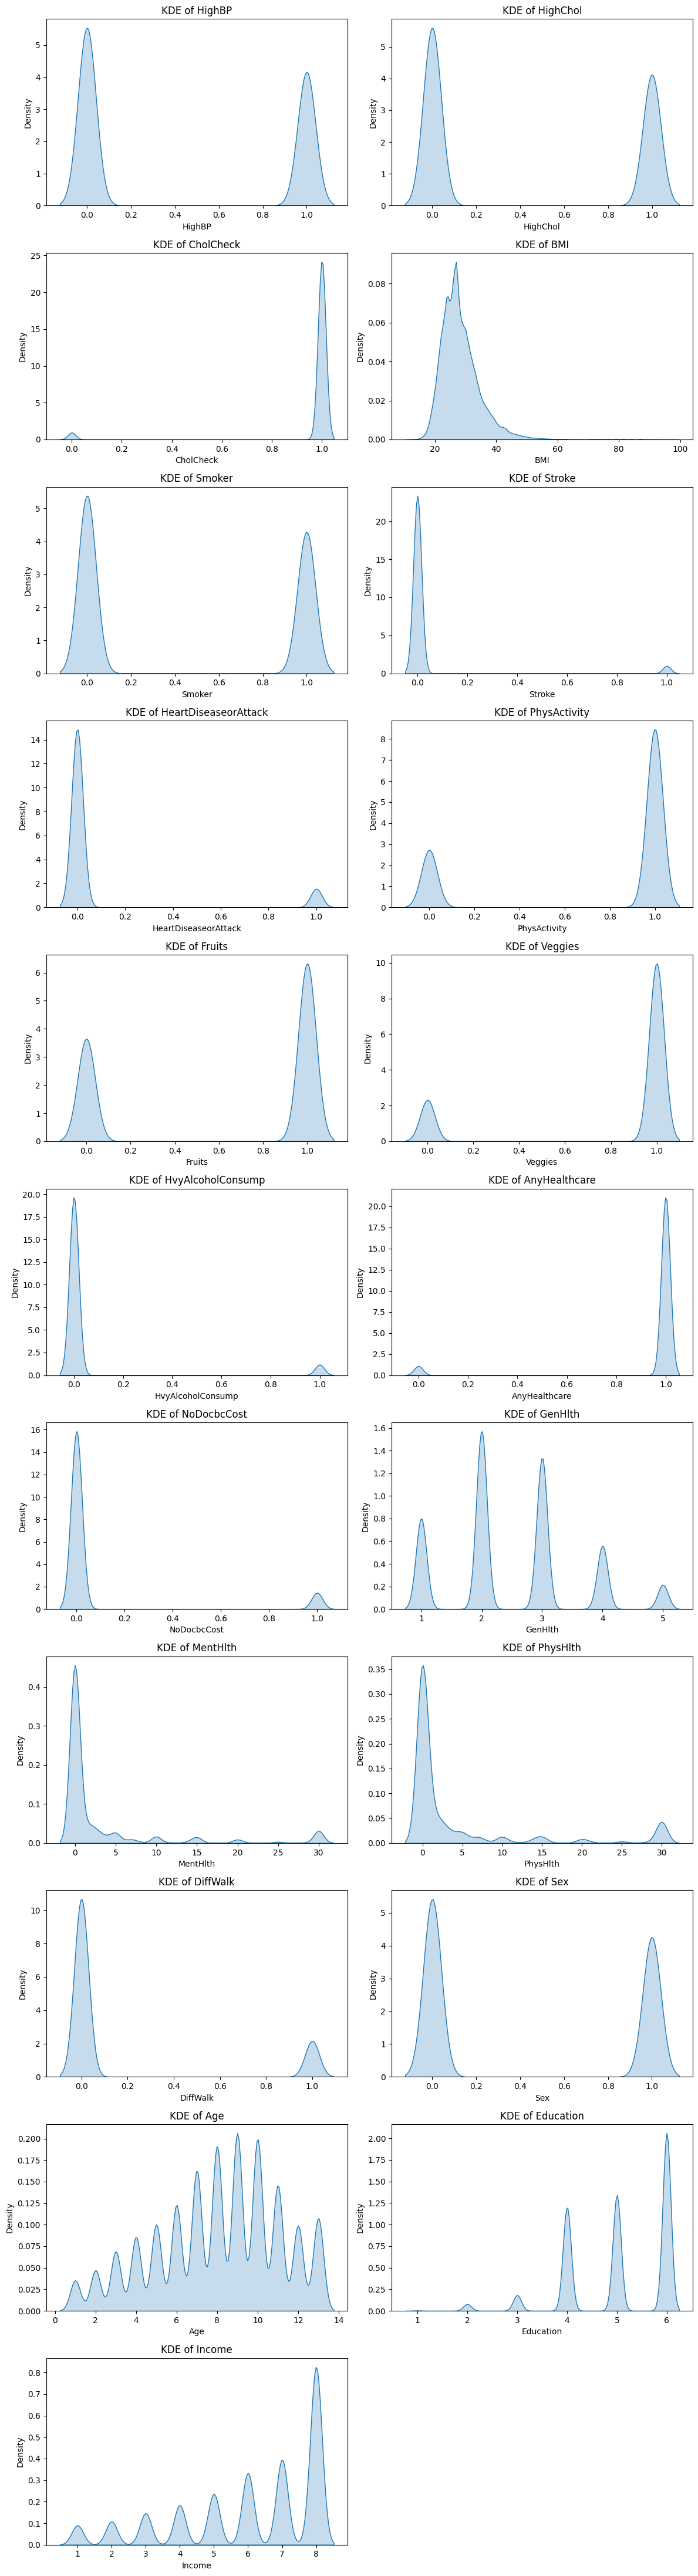

In [ ]:
# Ensure that all columns are numeric (if not, convert or select only numeric)
X_numeric = X.select_dtypes(include=[np.number])

# Determine grid layout based on number of numeric features
n_features = len(X_numeric.columns)
n_cols = 2  # Number of columns of subplots
n_rows = int(np.ceil(n_features / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()  # Flatten so we can iterate easily

# Plot a KDE for each numeric feature
for i, col in enumerate(X_numeric.columns):
    sns.kdeplot(data=X_numeric, x=col, fill=True, ax=axes[i])
    axes[i].set_title(f'KDE of {col}')

# Remove any extra axes if the number of features is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

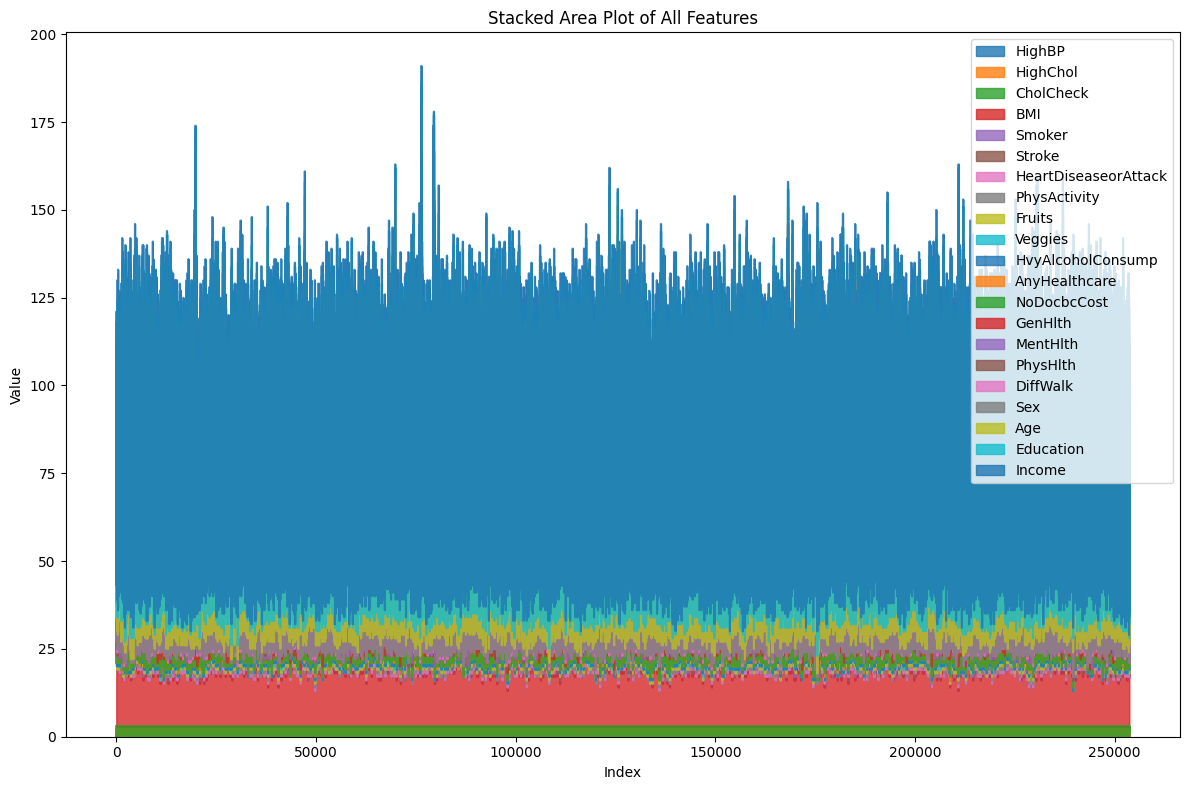

In [ ]:
# Create a stacked area plot for all features
plt.figure(figsize=(12, 8))
X.plot.area(alpha=0.8, ax=plt.gca())  # alpha=0.8 for slight transparency
plt.title("Stacked Area Plot of All Features")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

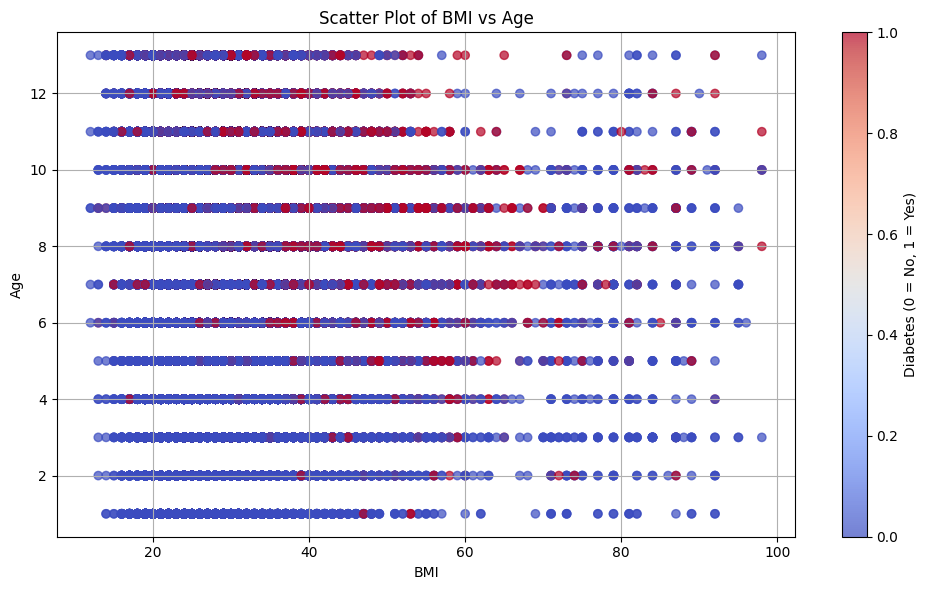

In [ ]:
# Scatter plot graph
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['BMI'], df['Age'], c=df['Diabetes_binary'], cmap='coolwarm', alpha=0.7)

plt.title('Scatter Plot of BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.colorbar(scatter, label='Diabetes (0 = No, 1 = Yes)')
plt.grid(True)
plt.tight_layout()
plt.show()

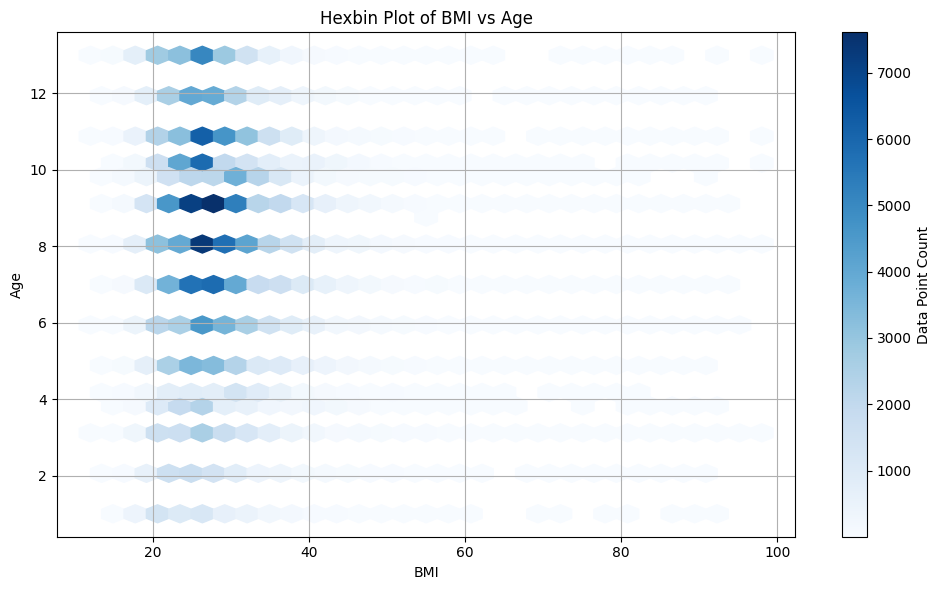

In [ ]:
# Hexbinplot graph
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['BMI'], df['Age'], gridsize=30, cmap='Blues', mincnt=1)

plt.title('Hexbin Plot of BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.colorbar(hb, label='Data Point Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Assignment 4

Outlier Identification for BMI and age

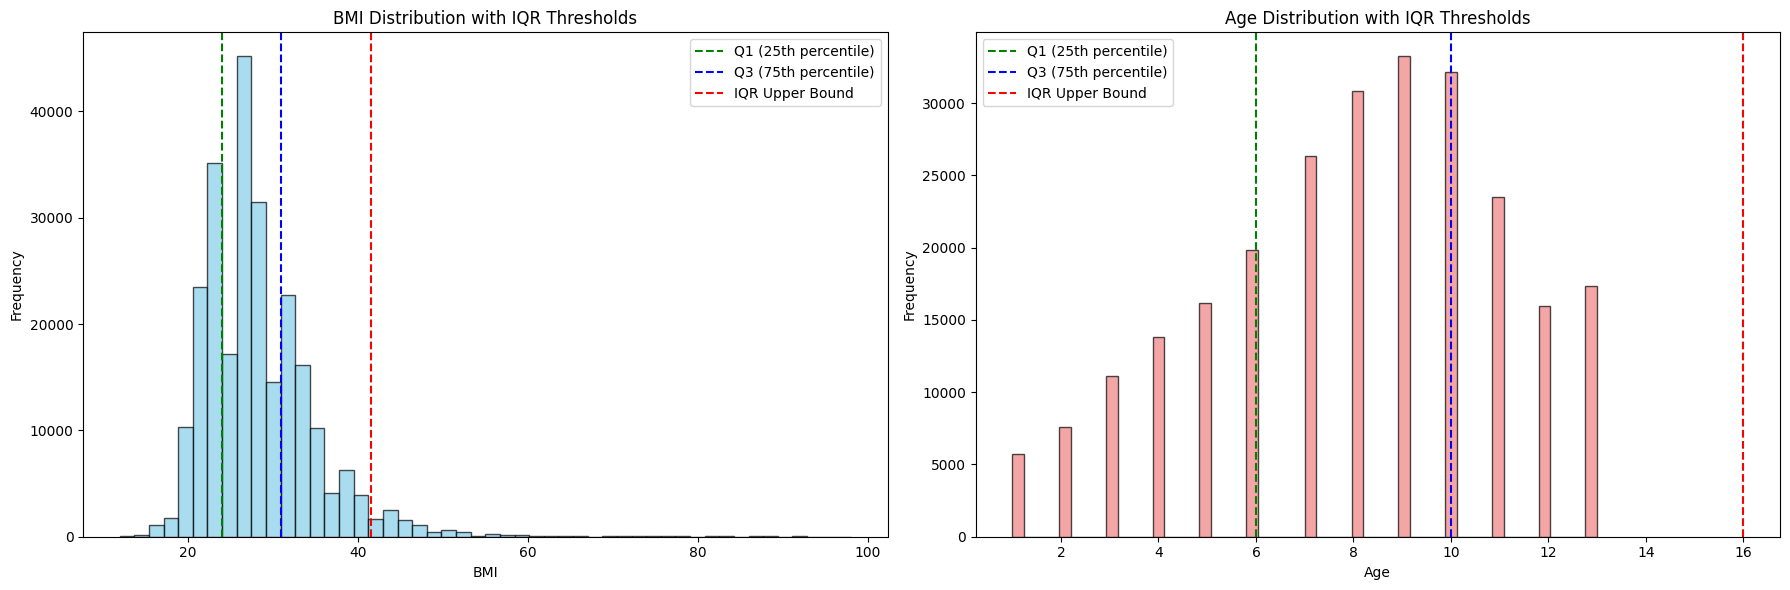

Original BMI rows containing outliers: 253680 9847
Original Age rows containing outliers: 253680 0


In [ ]:
# Choose both BMI and Age
bmi = X['BMI']
age = X['Age']

# Function to calculate IQR thresholds and outlier counts
def calculate_iqr_info(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return Q1, Q3, IQR, lower_bound, upper_bound, len(outliers)

# Step 3: Calculate for BMI
bmi_Q1, bmi_Q3, bmi_IQR, bmi_lower, bmi_upper, bmi_outliers_count = calculate_iqr_info(bmi)

# Step 4: Calculate for Age
age_Q1, age_Q3, age_IQR, age_lower, age_upper, age_outliers_count = calculate_iqr_info(age)

# Step 5: Plot both BMI and Age side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# BMI Plot
axes[0].hist(bmi, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(bmi_Q1, color='green', linestyle='--', label='Q1 (25th percentile)')
axes[0].axvline(bmi_Q3, color='blue', linestyle='--', label='Q3 (75th percentile)')
axes[0].axvline(bmi_upper, color='red', linestyle='--', label='IQR Upper Bound')
axes[0].set_title('BMI Distribution with IQR Thresholds')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Age Plot
axes[1].hist(age, bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1].axvline(age_Q1, color='green', linestyle='--', label='Q1 (25th percentile)')
axes[1].axvline(age_Q3, color='blue', linestyle='--', label='Q3 (75th percentile)')
axes[1].axvline(age_upper, color='red', linestyle='--', label='IQR Upper Bound')
axes[1].set_title('Age Distribution with IQR Thresholds')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

# Step 6: Print the summary
print(f"Original BMI rows containing outliers: {len(bmi)} {bmi_outliers_count}")
print(f"Original Age rows containing outliers: {len(age)} {age_outliers_count}")


Discretization for BMI

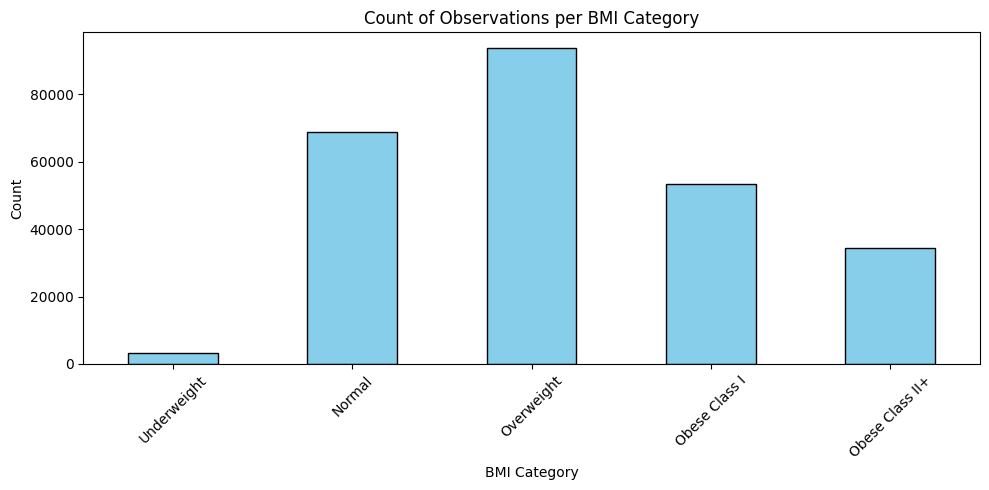

In [ ]:
# Load the dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
X = cdc_diabetes_health_indicators.data.features.copy()

# Discretize BMI (medical categories)
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II+']
X['BMI_Category'] = pd.cut(X['BMI'], bins=bmi_bins, labels=bmi_labels, right=True)


# Plot BMI Category Counts
plt.figure(figsize=(10, 5))
X['BMI_Category'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Observations per BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation Test for Feature Selection

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


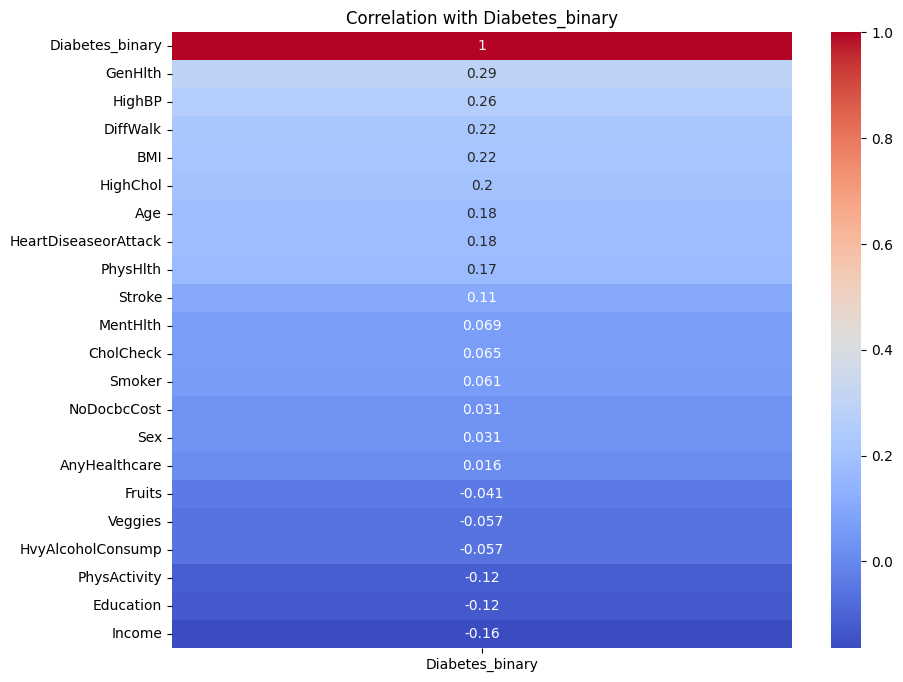

In [ ]:
# Include target
y = cdc_diabetes_health_indicators.data.targets['Diabetes_binary']
X = cdc_diabetes_health_indicators.data.features

# Merge for correlation
df_corr = X.copy()
df_corr['Diabetes_binary'] = y

# Compute correlation matrix
corr = df_corr.corr()

# Show top correlated features with target
print(corr['Diabetes_binary'].sort_values(ascending=False))

# Plot heatmap (optional)
plt.figure(figsize=(10,8))
sns.heatmap(corr[['Diabetes_binary']].sort_values(by='Diabetes_binary', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Diabetes_binary")
plt.show()

Chi-Square Test (for binary/categorical features)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Scale data for chi2 (chi2 expects non-negative values)
X_chi2 = X.copy()
X_chi2_scaled = MinMaxScaler().fit_transform(X_chi2)

# Apply chi-squared test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_chi2_scaled, y)

# Get scores
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns)
print(chi2_scores.sort_values(ascending=False))


DiffWalk                10059.506391
HighBP                  10029.013935
HeartDiseaseorAttack     7221.975378
HighChol                 5859.710582
PhysHlth                 4447.480218
GenHlth                  4128.559453
Stroke                   2725.225194
Age                       882.937629
PhysActivity              861.887532
Income                    826.497477
HvyAlcoholConsump         779.424807
MentHlth                  700.987741
Smoker                    521.978858
BMI                       369.770170
NoDocbcCost               229.542412
Education                 188.538188
Fruits                    154.291404
Veggies                   153.169215
Sex                       140.248274
CholCheck                  39.716825
AnyHealthcare               3.280938
dtype: float64


Feature Importance from Tree-Based Model - Random Forest

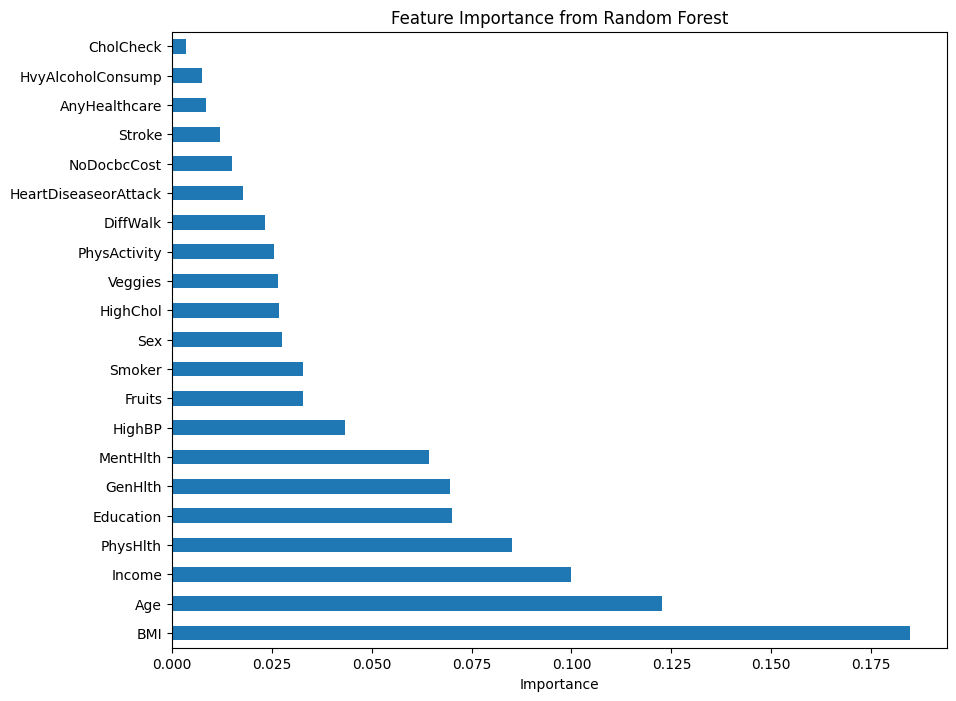

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.show()


Feature Creation

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Load the dataset
cdc = fetch_ucirepo(id=891)
X = cdc.data.features.copy()
y = cdc.data.targets['Diabetes_binary']

# Feature 1: ChronicDiseaseRisk = sum of three binary predictors
X['ChronicDiseaseRisk'] = X['HighBP'] + X['HighChol'] + X['HeartDiseaseorAttack']

# Feature 2: PoorGeneralHealth = 1 if GenHlth is 4 (fair) or 5 (poor)
X['PoorGeneralHealth'] = (X['GenHlth'] >= 4).astype(int)

# Feature 3: AnyPhysicalOrMentalHealthIssue = 1 if MentHlth > 0 or PhysHlth > 0
X['AnyPhysicalOrMentalHealthIssue'] = ((X['MentHlth'] > 0) | (X['PhysHlth'] > 0)).astype(int)

# Feature 4: HealthyLifestyle = 1 if PhysActivity + Fruits + Veggies are all 1
X['HealthyLifestyle'] = ((X['PhysActivity'] == 1) & (X['Fruits'] == 1) & (X['Veggies'] == 1)).astype(int)

# Feature 5: AccessIssues = 1 if NoDocbcCost == 1 or AnyHealthcare == 0
X['AccessIssues'] = ((X['NoDocbcCost'] == 1) | (X['AnyHealthcare'] == 0)).astype(int)

# Create a summary DataFrame for new features
feature_creation_summary = pd.DataFrame({
    "New Feature": [
        "ChronicDiseaseRisk",
        "PoorGeneralHealth",
        "AnyPhysicalOrMentalHealthIssue",
        "HealthyLifestyle",
        "AccessIssues"
    ],
    "Description": [
        "Sum of HighBP, HighChol, and HeartDiseaseorAttack",
        "1 if GenHlth is Fair (4) or Poor (5)",
        "1 if MentHlth > 0 or PhysHlth > 0",
        "1 if PhysActivity, Fruits, and Veggies are all 1",
        "1 if NoDocbcCost is 1 or AnyHealthcare is 0"
    ]
})

# Display the summary
print(feature_creation_summary.to_string(index=False))


                   New Feature                                       Description
            ChronicDiseaseRisk Sum of HighBP, HighChol, and HeartDiseaseorAttack
             PoorGeneralHealth              1 if GenHlth is Fair (4) or Poor (5)
AnyPhysicalOrMentalHealthIssue                 1 if MentHlth > 0 or PhysHlth > 0
              HealthyLifestyle  1 if PhysActivity, Fruits, and Veggies are all 1
                  AccessIssues       1 if NoDocbcCost is 1 or AnyHealthcare is 0


Show Correlction After

In [ ]:
# Combine X with target for correlation
X_temp = X.copy()
X_temp['Diabetes_binary'] = y

# Show correlation with engineered features
engineered_cols = ['ChronicDiseaseRisk', 'PoorGeneralHealth', 'AnyPhysicalOrMentalHealthIssue',
                   'HealthyLifestyle', 'AccessIssues']

print(X_temp[engineered_cols + ['Diabetes_binary']].corr()['Diabetes_binary'].sort_values(ascending=False))


Diabetes_binary                   1.000000
ChronicDiseaseRisk                0.307851
PoorGeneralHealth                 0.249898
AnyPhysicalOrMentalHealthIssue    0.085078
AccessIssues                      0.017037
HealthyLifestyle                 -0.095774
Name: Diabetes_binary, dtype: float64


#Model Training -- Assignment 5

###logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data
X = df.drop(columns=['Diabetes_binary'])  # Replace 'Diabetes_012' with your actual target column name
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train Logistic Regression (multi_class removed as it's deprecated)
logreg = LogisticRegression(
    max_iter=500,
    solver='lbfgs'
)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Logistic Regression predictions
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression — Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Logistic Regression — Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression — Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     43667
           1       0.52      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736

Logistic Regression — Confusion Matrix:
[[42626  1041]
 [ 5950  1119]]


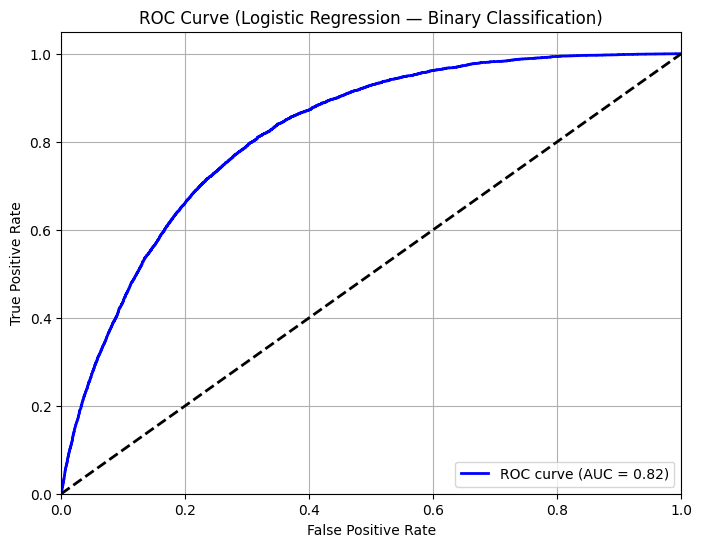

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score = logreg.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (diabetes)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression — Binary Classification)')
plt.legend(loc="lower right")
plt.grid()
plt.show()



In [ ]:
# Logistic Regression with class weights
logreg_balanced = LogisticRegression(
    max_iter=500,
    solver='lbfgs',
    class_weight='balanced'
)
logreg_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

Logistic Regression Balanced:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82     43667
           1       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736

Logistic Regression Balanced — Confusion Matrix:
[[31739 11928]
 [ 1689  5380]]
Balanced Logistic Regression AUC: 0.82


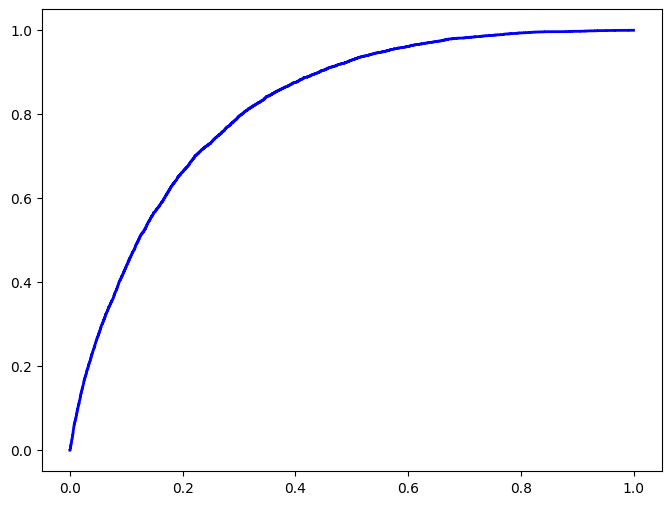

In [ ]:
y_pred_logreg_bal = logreg_balanced.predict(X_test)
print("Logistic Regression Balanced:")
print(classification_report(y_test, y_pred_logreg_bal))
print("Logistic Regression Balanced — Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_bal))
y_score_logreg_bal = logreg_balanced.predict_proba(X_test)[:, 1]
fpr_logreg_bal, tpr_logreg_bal, _ = roc_curve(y_test, y_score_logreg_bal)
roc_auc_logreg_bal = auc(fpr_logreg_bal, tpr_logreg_bal)
plt.figure(figsize=(8, 6))



plt.plot(fpr_logreg_bal, tpr_logreg_bal, color='blue', lw=2,
         label=f'Logistic Regression (AUC = {roc_auc_logreg_bal:.2f})')
print(f"Balanced Logistic Regression AUC: {roc_auc_logreg_bal:.2f}")

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

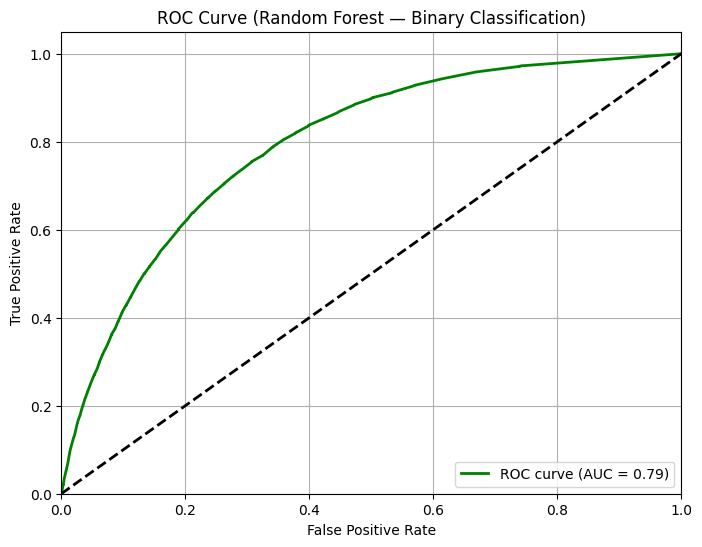

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score_rf = rf.predict_proba(X_test)[:, 1]  # Probability for positive class


# ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2,
         label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest — Binary Classification)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# Random Forest predictions
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest — Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest — Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Random Forest — Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.49      0.18      0.26      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736

Random Forest — Confusion Matrix:
[[42342  1325]
 [ 5808  1261]]


###balanced RF

In [ ]:
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf_balanced.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_rf_bal = rf_balanced.predict(X_test)

print("\nRandom Forest Balanced — Classification Report:")
print(classification_report(y_test, y_pred_rf_bal))

print("Random Forest Balanced — Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_bal))



Random Forest Balanced — Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.47      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.67      0.57      0.58     50736
weighted avg       0.82      0.86      0.83     50736

Random Forest Balanced — Confusion Matrix:
[[42383  1284]
 [ 5937  1132]]


Balanced Random Forest AUC: 0.79


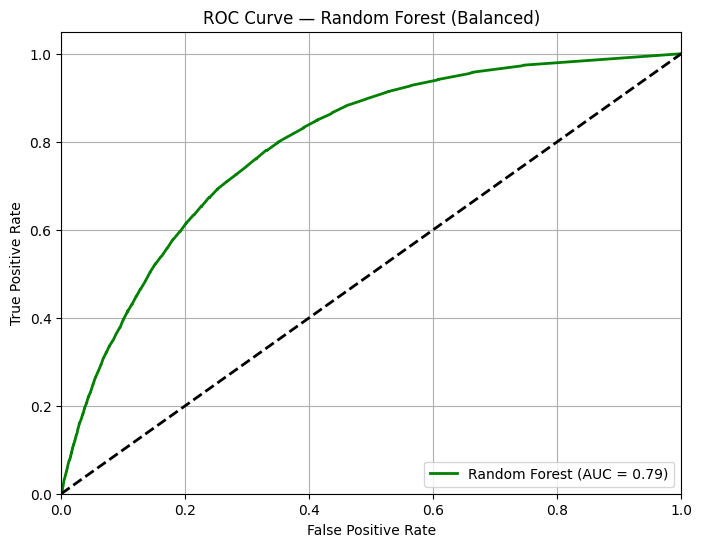

In [ ]:
y_score_rf_bal = rf_balanced.predict_proba(X_test)[:, 1]

fpr_rf_bal, tpr_rf_bal, _ = roc_curve(y_test, y_score_rf_bal)
roc_auc_rf_bal = auc(fpr_rf_bal, tpr_rf_bal)

print(f"Balanced Random Forest AUC: {roc_auc_rf_bal:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_bal, tpr_rf_bal, color='green', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf_bal:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Random Forest (Balanced)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


###Xgboost Model

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

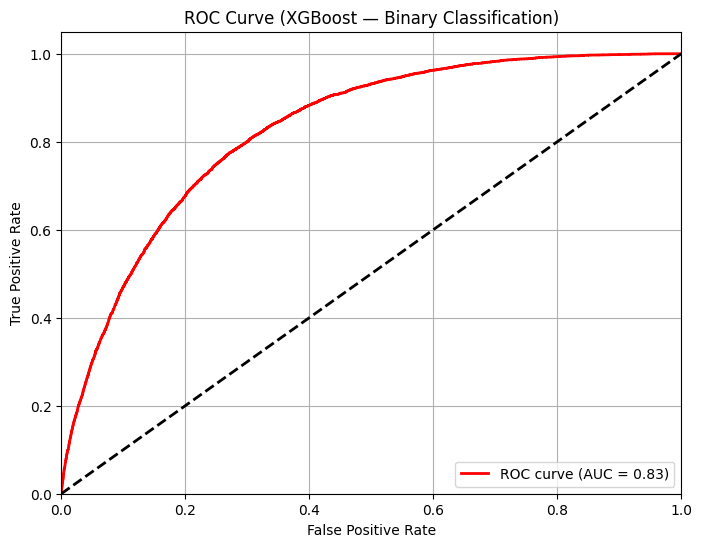

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score_xgb = xgb.predict_proba(X_test)[:, 1]  # Probability for positive class

# ROC curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2,
         label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost — Binary Classification)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# XGBoost predictions
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost — Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("XGBoost — Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))



XGBoost — Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.56      0.17      0.26      7069

    accuracy                           0.87     50736
   macro avg       0.72      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

XGBoost — Confusion Matrix:
[[42760   907]
 [ 5901  1168]]


### balanced XGBOOST

In [ ]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print("scale_pos_weight:", scale_pos_weight)


scale_pos_weight: 6.176998974431517


In [ ]:
from xgboost import XGBClassifier

xgb_balanced = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

xgb_balanced.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:49:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb_bal = xgb_balanced.predict(X_test)

print("\nXGBoost Balanced — Classification Report:")
print(classification_report(y_test, y_pred_xgb_bal))

print("XGBoost Balanced — Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_bal))



XGBoost Balanced — Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.82     43667
           1       0.31      0.79      0.44      7069

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.72      0.76     50736

XGBoost Balanced — Confusion Matrix:
[[31121 12546]
 [ 1493  5576]]


In [ ]:
y_score_xgb_bal = xgb_balanced.predict_proba(X_test)[:, 1]

fpr_xgb_bal, tpr_xgb_bal, _ = roc_curve(y_test, y_score_xgb_bal)
roc_auc_xgb_bal = auc(fpr_xgb_bal, tpr_xgb_bal)

print(f"Balanced XGBoost AUC: {roc_auc_xgb_bal:.2f}")


Balanced XGBoost AUC: 0.83


Balanced XGBoost AUC: 0.83


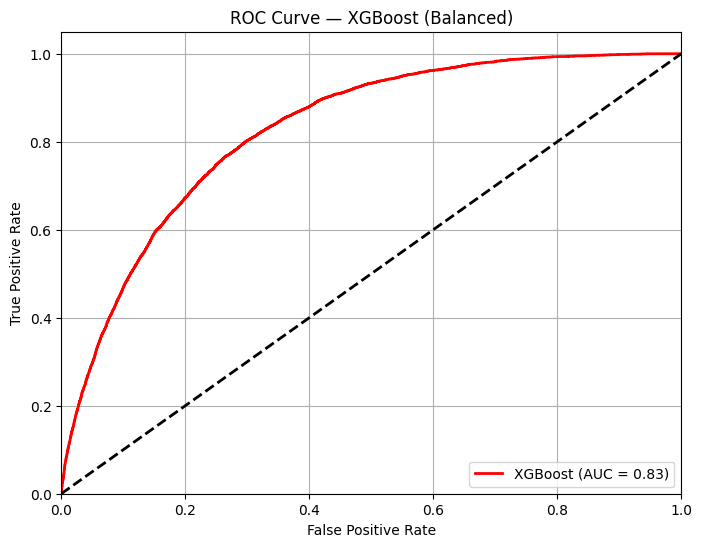

In [ ]:
print(f"Balanced XGBoost AUC: {roc_auc_xgb_bal:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_bal, tpr_xgb_bal, color='red', lw=2,
         label=f'XGBoost (AUC = {roc_auc_xgb_bal:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — XGBoost (Balanced)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


##All Balanced Models Comaprison

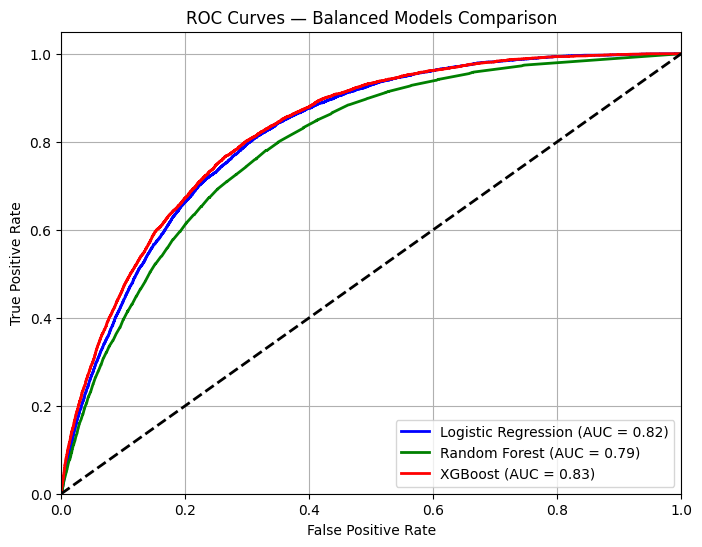

In [ ]:
plt.figure(figsize=(8, 6))

# Logistic Regression
plt.plot(fpr_logreg_bal, tpr_logreg_bal, color='blue', lw=2,
         label=f'Logistic Regression (AUC = {roc_auc_logreg_bal:.2f})')

# Random Forest
plt.plot(fpr_rf_bal, tpr_rf_bal, color='green', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf_bal:.2f})')

# XGBoost
plt.plot(fpr_xgb_bal, tpr_xgb_bal, color='red', lw=2,
         label=f'XGBoost (AUC = {roc_auc_xgb_bal:.2f})')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves — Balanced Models Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()
